## Machine Learning-Based Image Classification Using TensorFlow

In [1]:
# Importing required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

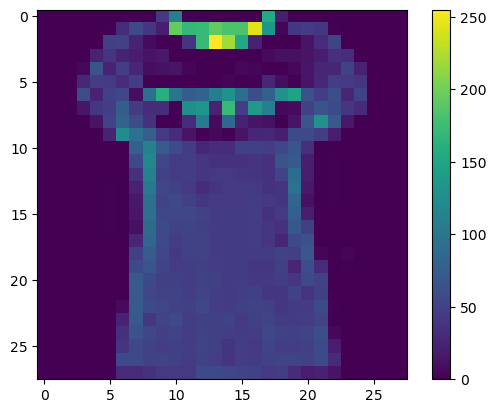

In [4]:
#Inspecting a random image to findout pixel values
plt.figure()
plt.imshow(train_images[34])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#Scaling pixel values into range of 0,1
train_images = train_images / 255.0
test_images = test_images / 255.0

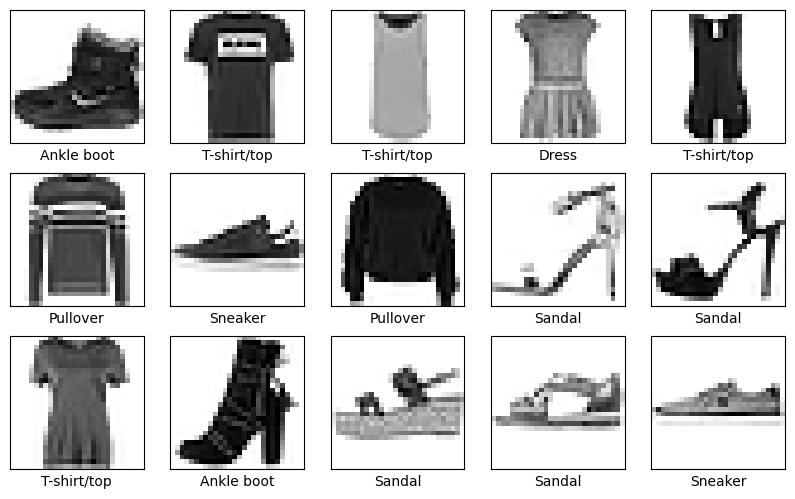

In [6]:
#Verifying if data is ready to train Neural networks
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
#Defining layers for our NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Flattening 2D image data into 28x28 linear data
    keras.layers.Dense(128, activation='relu'), #First layer with 128 neurons & ReLU activation
    keras.layers.Dense(10) #Output layer with 10 neurons as we have 10 class_names
])

C:\Users\surya\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7848 - loss: 0.6240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8633 - loss: 0.3754
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8737 - loss: 0.3469
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8853 - loss: 0.3137
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8925 - loss: 0.2957
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8953 - loss: 0.2802
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9021 - loss: 0.2653
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9041 - loss: 0.2547
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9072 - loss: 0.2483
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9097 - loss: 0.2392
313/313 - 1s - 2ms/step - accuracy: 0.8856 - loss: 0.3293

Test accuracy: 0.8855999708175659


In [10]:
#Make Predictions
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.1852330e-06, 5.1259264e-07, 1.9113465e-10, 1.6374055e-09,
       8.3677404e-10, 1.5591889e-03, 4.0256600e-06, 4.8292722e-03,
       2.3035497e-07, 9.9360353e-01], dtype=float32)

In [11]:
#Label with highest confidence
np.argmax(predictions[0])

9

In [12]:
#Comparing
test_labels[0]

9

In [13]:
#Defining functions for plotting predictions
def plot_pred(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  pred_label = np.argmax(predictions_array)
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_pred_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  pred_label = np.argmax(predictions_array)

  thisplot[pred_label].set_color('red')
  thisplot[true_label].set_color('green')

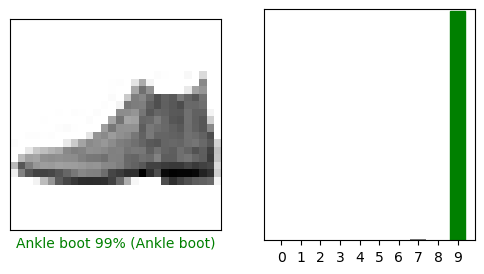

In [14]:
#Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_pred(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_pred_array(i, predictions[i],  test_labels)
plt.show()

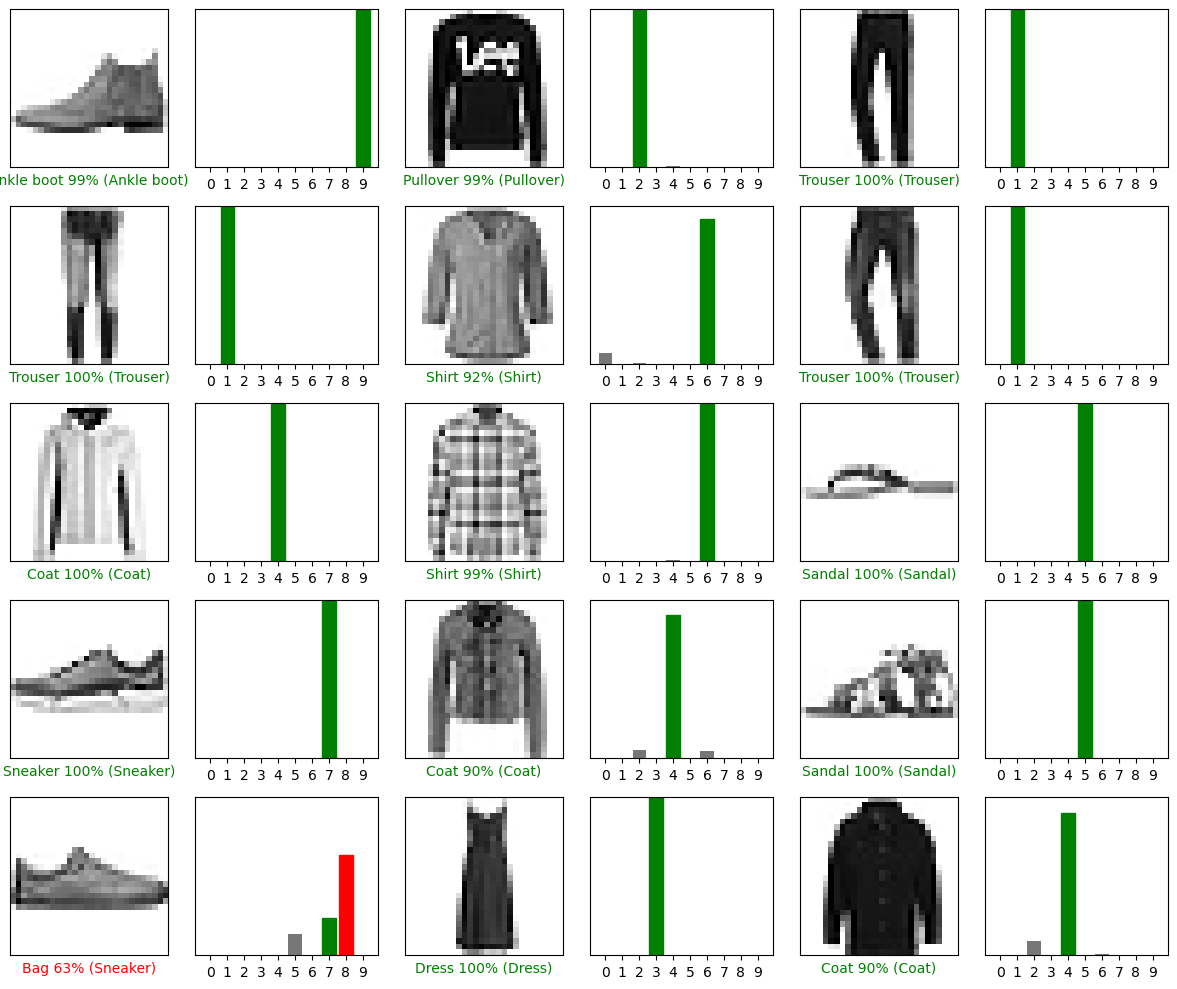

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in green and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##### In this project, we successfully developed an image classification model using TensorFlow to recognize fashion items from the Fashion MNIST dataset. The model architecture included a flattened input layer, a dense hidden layer with ReLU activation, and an output layer producing logits for 10 classes. After compiling the model with the Adam optimizer and training it over 10 epochs, we achieved a training accuracy exceeding 90.97% and a final test accuracy of 88.55%, indicating strong generalization on unseen data.

##### Furthermore, we visualized both raw predictions and prediction probabilities, allowing for interpretability of model performance. Correct classifications were highlighted in green and incorrect ones in red, demonstrating the model's strengths and areas for improvement. These visual tools, along with the numerical metrics, confirm that the trained model is capable of reliably classifying grayscale fashion images.

##### Overall, this project illustrates the effectiveness of deep learning approaches for supervised image classification tasks and highlights the simplicity and power of TensorFlow for prototyping and evaluating machine learning models.